<a href="https://colab.research.google.com/github/coddingyun/pytorch/blob/main/BookStudy_ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 원-핫 인코딩 (One-Hot Encoding)
- 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 표현.

- 원-핫 벡터(one-hot vector): 원-핫 인코딩으로 표현된 벡터

- 레이블링 방법으로 정수 인코딩을 할 수 있지만, 손실함수(제곱 오차)를 계산 할때, 숫자가 가까울 수록 오차가 작고, 멀어질 수록 오차가 커진다.

- 클래스 간의 관계를 균등하게 분배해야 하므로 원-핫 인코딩을 사용한다. 
-> 유클리드 거리가 동일하다고 표현 
-> 무작위성을 가짐. 
-> 단어의 유사성을 구할 수 없다는 단점

#2. 소프트맥스 회귀 이해하기

###1. 다중 클래스 분류 (Multi-class Classification)

소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 함수를 지나게 만들어야 한다.

H(x) = *softmax*(WX+b)


###2. 소프트맥스 함수
1)소프트맥스 함수의 이해
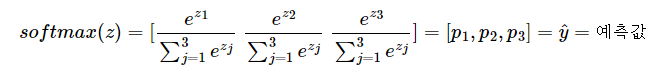

2) 그림을 통한 이해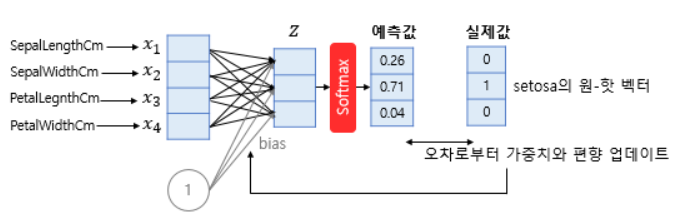

- 입력 벡터로 차원 축소: 입력 벡터의 차원수만큼 결과값이 나오도록 가중치 곱 진행

- 오차 계산 방법: 실제 값을 원-핫 벡터로 표현

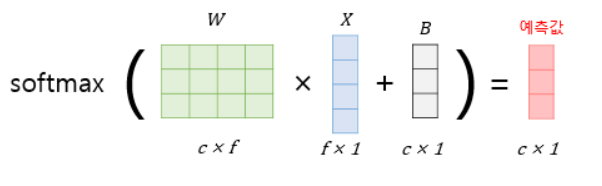
- f는 특성의 수, c는 클래스의 개수

###3. 붓꽃 품종 분류하기 행렬 연산으로 이해하기
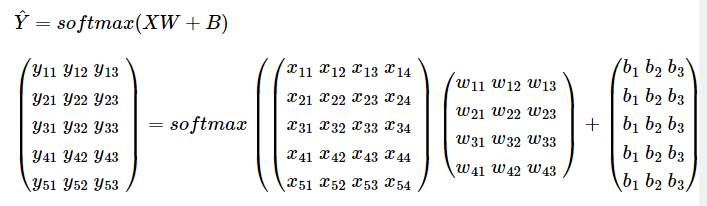

###4. 비용함수(Cost function)
1) 크로스 엔트로피 함수
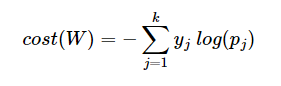

- 실제값이 1일 경우 정확하게 예측한 경우 -1log(1) = 0 이 된다. 즉 최소화하는 방향으로 학습해야한다.

- 최종 비용 함수: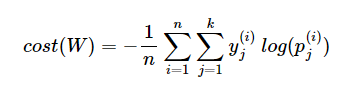

2) 이진 분류에서의 크로스 엔트로피 함수
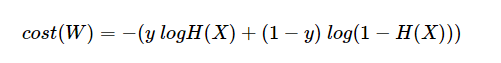
(로지스틱 회귀 크로스 엔트로피의 함수식)

y->y1
y-1->y2
H(x)->p1
1-H(x)->p2
2->k

- 소프트맥스 함수의 최종 비용 함수에서 k가 2라고 가정하면 로지스틱 회귀 비용 함수와 같음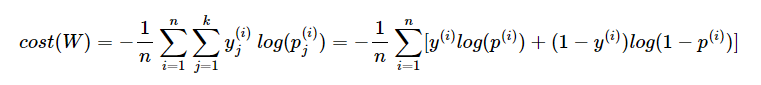

#3. 소프트맥스 회귀의 비용 함수 구현하기

In [ ]:
import torch
import torch.nn.functional as F
torch.manual_seed(1)

In [ ]:
z=torch.FloatTensor([1,2,3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum() #1인지 확인

tensor(1.)

In [ ]:
z=torch.rand(3,5,requires_grad=True)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward>)


In [ ]:
y=torch.randint(5,(3,)).long()
print(y)

tensor([0, 2, 1])


In [ ]:
y_one_hot = torch.zeros_like(hypothesis) # 모두 0을 가지는 3*5텐서
y_one_hot.scatter_(1, y.unsqueeze(1),1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [ ]:
print(y.unsqueeze(1)) #3x1텐서
print(y_one_hot)

tensor([[0],
        [2],
        [1]])
tensor([[1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])


In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.4689, grad_fn=<MeanBackward0>)


###2. 파이토치로 소프트맥스의 비용 함수 구현하기

In [ ]:
# 1. F.softmax() + torch.log() = F.log_softmax()
torch.log(F.softmax(z, dim=1))
# = F.log_softmax(z, dim=1)

tensor([[-1.3301, -1.8084, -1.6846, -1.3530, -2.0584],
        [-1.4147, -1.8174, -1.4602, -1.6450, -1.7758],
        [-1.5025, -1.6165, -1.4586, -1.8360, -1.6776]], grad_fn=<LogBackward>)

In [ ]:
# 2. F.log_softmax() + F.nll_loss() = F.cross_entrophy()
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
(y_one_hot * -F.log_softmax(z, dim=1)).sum(dim=1).mean()

tensor(1.4689, grad_fn=<MeanBackward0>)

In [ ]:
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.4689, grad_fn=<NllLossBackward>)

In [ ]:
F.cross_entropy(z, y) # F.cross_entropy는 비용함수, 소프트맥스 함수 포함하고 있음

tensor(1.4689, grad_fn=<NllLossBackward>)

#4. 소프트맥스 회귀 구현하기

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
# 8개의 샘플, 3개의 클래스

###1. 소프트맥스 회귀 구현하기(로우-레벨)

In [ ]:
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [ ]:
y_one_hot = torch.zeros(8,3)
y_one_hot.scatter_(1, y_train.unsqueeze(1),1)
print(y_one_hot.shape)

torch.Size([8, 3])


In [ ]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=0.1)

In [ ]:
nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  hypothesis = F.softmax(x_train.matmul(W)+b, dim=1)
  cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


###2. 소프트맥스 회귀 구현하기(하이-레벨)

In [ ]:
W = torch.zeros((4,3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W,b], lr=0.1)

nb_epochs=1000
for epoch in range(nb_epochs+1):
  z=x_train.matmul(W)+b
  cost = F.cross_entropy(z, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


###3. 소프트맥스 회귀 nn.Moduls로 구현하기

In [ ]:
model = nn.Linear(4,3) # input_dim = 4, output_dim = 3

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


###4. 소프트맥스 회귀 클래스로 구현하기

In [ ]:
class SoftmaxClassifierModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(4,3)

  def forward(self, x):
    return self.linear(x)

In [ ]:
model=SoftmaxClassifierModel()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.637636
Epoch  100/1000 Cost: 0.647903
Epoch  200/1000 Cost: 0.564643
Epoch  300/1000 Cost: 0.511043
Epoch  400/1000 Cost: 0.467249
Epoch  500/1000 Cost: 0.428281
Epoch  600/1000 Cost: 0.391924
Epoch  700/1000 Cost: 0.356742
Epoch  800/1000 Cost: 0.321577
Epoch  900/1000 Cost: 0.285617
Epoch 1000/1000 Cost: 0.250818


#5. 소프트맥스 회귀로 MNIST 데이터 분류하기

In [ ]:
# 784(28*28)차원을 벡터를 만드는 코드
#for X, Y in data_loader: # X (배치크기 x 1 x 28 x 28)
#  X=X.view(-1, 28*28) # X (배치크기 x 784)

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [ ]:
USE_CUDA = torch.cuda.is_available(); # GPU를 사용가능하면 True, 아니면 False
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용가능하면 사용하고, 아니면 CPU 사용
print("다음 기기로 학습합니다: ", device)

다음 기기로 학습합니다:  cpu


In [ ]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
training_epochs = 15
batch_size = 100

In [ ]:
mnist_train = dsets.MNIST(root='MNIST_data/', #MNIST 데이터를 다운받을 경로
                          train = True,
                          transform=transforms.ToTensor(), #현재 데이터를 파이토치 텐서로 변환
                          download=True) # 해당경로에 MNIST 데이터가 없다면 다운로드
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train = False,
                          transform=transforms.ToTensor(),
                          download=True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
data_loader = DataLoader(dataset=mnist_train, #로드할 대상
                         batch_size = batch_size,
                         shuffle=True, #에폭마다 미니배치 셔플 여부
                         drop_last=True) #마지막 배치 버릴 것인지 - > 다른 미니배치 보다 개수가 적은 마지막 배치
                         #경사하강법 상대적으로 과대 평가되는 현상을 막아줌

In [ ]:
linear = nn.Linear(784, 10, bias=True).to(device)
#to()함수는 연산을 어디서 수행할지 결정, cpu 사용시 필요 없음

In [ ]:
criterion = nn.CrossEntropyLoss().to(device) #내부적으로 소프트맥스 함수 포함
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [ ]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for X,Y in data_loader:
    X = X.view(-1, 28*28).to(device)

    optimizer.zero_grad()
    hypothesis= linear(X)
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost/total_batch

  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print("Learnig Finished")

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577745
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404700
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456524
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515589
Epoch: 0011 cost = 0.281914085
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422735
Learnig Finished


Accuracy:  0.8883000016212463
Label:  7
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


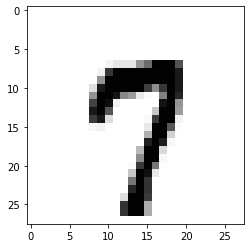

In [ ]:
with torch.no_grad():
  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = linear(X_test)
  correct_prediction = torch.argmax(prediction,1 )==Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy: ', accuracy.item())

  r=random.randint(0, len(mnist_test)-1)
  X_single_data = mnist_test.test_data[r:r+1].view(-1,28*28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r+1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = linear(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())
  plt.imshow(mnist_test.test_data[r:r+1].view(28,28),cmap='Greys', interpolation='nearest')
  plt.show()